__Задача 1__

Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

1. Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
2. Является ли значимым получившееся уравнение регрессии?

In [16]:
import pandas as pd
import numpy as np


def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - samples.mean()) ** 2).sum()

x = np.array([[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]])

y =  np.array([ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218])

ones = np.ones((x.shape[0], 1))

for i in range(4):
    for j in range(i + 1, 4):
        print(f'Взяты столбцы {i+1},{j+1}')
        xij = np.hstack((ones, np.atleast_2d(x[:,i]).T, np.atleast_2d(x[:,j]).T))
        XTX = xij.T.dot(xij)
        print("det", np.linalg.det(XTX))
        XTX_inv = np.linalg.inv(XTX)
        b = XTX_inv.dot(xij.T).dot(y)
        print('Наша модель',b)
        z2 = xij.dot(b)
        e = y - z2
        print('e =', e.mean())
        R = 1 - sum_of_squares(e) / sum_of_squares(y)
        print(f'R = {R}')
        print()



Взяты столбцы 1,2
det 349.7782033818847
Наша модель [6.70781579 0.40786841 1.03360247]
e = 2.042810365310288e-15
R = 0.18113594742585215

Взяты столбцы 1,3
det 2835.3600226240965
Наша модель [3.62455695 1.62531203 1.21134979]
e = -2.575717417130363e-15
R = 0.7634246238793152

Взяты столбцы 1,4
det 1689.2124743606082
Наша модель [5.70686123 0.68359949 1.12650707]
e = 8.08242361927114e-15
R = 0.4532966783144077

Взяты столбцы 2,3
det 1427.8125776081495
Наша модель [2.48896193 1.60611956 0.86269915]
e = -2.2293278334473145e-14
R = 0.547948273403901

Взяты столбцы 2,4
det 701.732736445317
Наша модель [1.91685221 1.74373667 1.31971882]
e = 2.1582735598713044e-14
R = 0.6062055761129932

Взяты столбцы 3,4
det 4547.328074863321
Наша модель [3.64001086 0.70753914 1.04851745]
e = -1.3145040611561854e-14
R = 0.622441987650532



В даном случае видно что лучший коэффициент детерминации R = 0.76342 когда мы берем первый и третий признаки. Детерминанты во всех случаях не близки к 0, так что вычисление всех обратных матриц происходит без проблем.
в данном случае наша модель: $$y = 3.6245 - 1.6253 \cdot x_1 + 1.2113 \cdot x_2,$$

За нулевую гипотезу принимаем то, что коэффициент детерминации равен 0.

In [17]:
from scipy import stats
alpha = 0.05
n = 10
m = 2
k1 = m
k2 = n - m - 1
t = stats.f.ppf(1-alpha, k1, k2)
print(f"Критическая область: ({t}, +inf)")
F = (R / k1) / ((1 - R) / k2)
print(f"Ститистика Фишера", F)

Критическая область: (4.73741412777588, +inf)
Ститистика Фишера 5.770098595498478


Значение статистики попало в критическую область, так что полученное уравнение регрессии полуается значимым.

__Задача 2__

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница `A` была посещена 2509 раз, из них 77 закончились совершением покупки, страница `B` была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах `A` и `B`?


In [18]:
n1 = 2509
n2 = 1465
k = 2
k1 = k - 1
k2 = n - k
n = 2509 + 1465

# 1 совершение покупки, 0 отсутствие покупки.
y1_mean = 77 / n1
y2_mean = 60 / n2
y_mean = (77 + 60) / n
print(y1_mean, y2_mean, y_mean)

SS_b = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2
SS_w = 77 * (1 - y1_mean) ** 2 + (n1 - 77) * (0 - y1_mean) ** 2 + 60 * (1 - y2_mean) ** 2  + (n2 - 60) * (0 - y2_mean) ** 2
# y1 = 77*"1" + (2509 - 77) * "0"
# y1 = np.array([int(i) for i in y1])
# y2 = 60*"1" + (1465 - 60) * "0"
# y2 = np.array([int(i) for i in y2])
# SS_w = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum()

SS_b, SS_w


0.03068951773614986 0.040955631399317405 0.03447408152994464


(0.09748158004016791, 132.17956925035742)

In [19]:
sigma2_b = SS_b / k1
sigma2_w = SS_w / k2
sigma2_b, sigma2_w

(0.09748158004016791, 16.522446156294677)

In [20]:
F = sigma2_b / sigma2_w
F

0.005899948416719738

In [21]:
alpha = 0.05
t = stats.f.ppf(1 - alpha, k1, k2)
print(f"Критическая область: ({t}, +inf)")


Критическая область: (5.317655071578714, +inf)


Мы не попапли в нашу критическую областm, соответственно наша нулевая гипотеза, о том что средние по этим выборкам равны, верна.
страницы одинаково продают с учетом нашего выбранного уровня значимости.

__Задача 3__

__Квартет Энскомба__ — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

```
{
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}
```

По каждой паре выборок посчитайте:

1. выборочное среднее и дисперсию каждой выборки,
2. коэффициент корреляции Пирсона и прямую линейной регрессии.

Убедившись в том, что они не практически не отличаются, постройте `scatter plot` по каждой паре выборок.

сет номер 1
[10.  8. 13.  9. 11. 14.  6.  4. 12.  7.  5.]
[ 8.04  6.95  7.58  8.81  8.33  9.96  7.24  4.26 10.84  4.82  5.68]
выборочное среднее x:9.0, y: 7.500909090909093 
выборочная дисперсия x:10.0, y: 3.7520628099173554 
Кореляция Пирсона: 1.0 
Прямая линейной регрессии: y = 3.0 + 0.5 * x

сет номер 2
[10.  8. 13.  9. 11. 14.  6.  4. 12.  7.  5.]
[9.14 8.14 8.74 8.77 9.26 8.1  6.13 3.1  9.13 7.26 4.74]
выборочное среднее x:9.0, y: 7.50090909090909 
выборочная дисперсия x:10.0, y: 3.752390082644628 
Кореляция Пирсона: 0.9999999999999998 
Прямая линейной регрессии: y = 3.0 + 0.5 * x

сет номер 3
[10.  8. 13.  9. 11. 14.  6.  4. 12.  7.  5.]
[ 7.46  6.77 12.74  7.11  7.81  8.84  6.08  5.39  8.15  6.42  5.73]
выборочное среднее x:9.0, y: 7.5 
выборочная дисперсия x:10.0, y: 3.747836363636364 
Кореляция Пирсона: 1.0 
Прямая линейной регрессии: y = 3.0 + 0.5 * x

сет номер 4
[ 8.  8.  8.  8.  8.  8.  8. 19.  8.  8.  8.]
[ 6.58  5.76  7.71  8.84  8.47  7.04  5.25 12.5   5.56  7.91  6.89]

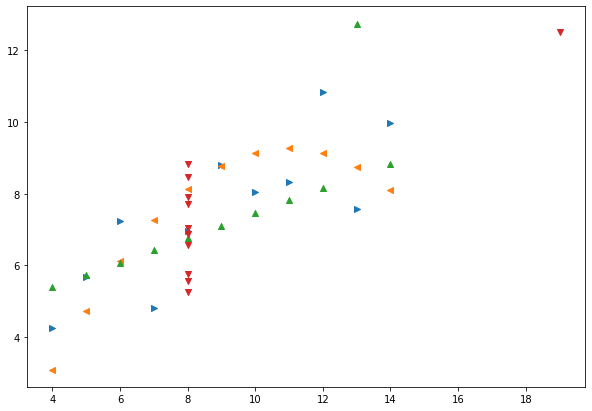

In [22]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
samples = {
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}

for i in range(1,5):
    print(f'сет номер {i}')
    x = np.array(samples[f'x{i}'])
    y = np.array(samples[f'y{i}'])
    print(x)
    print(y)
    print(f"выборочное среднее x:{x.mean()}, y: {y.mean()} ")
    print(f"выборочная дисперсия x:{x.var()}, y: {y.var()} ")
    print(f"Кореляция Пирсона: {np.corrcoef(x, y)[1][1]} ")
    b1 = np.cov(x, y, ddof=1)[0, 1] / np.var(x, ddof=1)
    b0 = y.mean() - b1 * x.mean()
    print(f'Прямая линейной регрессии: y = {round(b0,1)} + {round(b1,1)} * x')
    print()
    markers = ('>', '<', '^', 'v')
    plt.scatter(x, y, marker=markers[i-1],)